In [1]:
import sys 
sys.path.insert(0, '..')

In [2]:
from process_bigraph import Composite

from biosimulator_processes.neuroml_functions import *
from biosimulator_processes.steps.neuron_network import SimpleNeuronNetwork, SimpleNeuron
from biosimulator_processes import CORE
import os

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'utc-tellurium',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d',
  'utc-comparator',
  'simple-neuron',
  'simple-neuron-network']


### Simple Single Neuron

In [3]:
neuron_config0 = {
    'doc_config': {
        'doc_id': "IzSingleNeuron",
        'model_name': "Izhikevich2007Cell",
        'model_id': "izh2007RS0",
        'param_config': {
            'v0': "-60mV",
            'C': "100pF",
            'k': "0.7nS_per_mV",
            'vr': "-60mV",
            'vt': "-40mV",
            'vpeak': "35mV",
            'a': "0.03per_ms",
            'b': "-2nS",
            'c': "-50.0mV",
            'd': "100pA"  
        },
        'network_id': "IzNet"
    },
    'simulation_config': {
        'simulation_id': "example-single-izhikevich2007cell-sim",
        'duration': 2000,
        'dt': 0.2,
        'simulation_seed': 42,
        'max_memory': "2G"
    },
    # 'save_dir': os.getcwd()
}


neuron = SimpleNeuron(config=neuron_config0, core=CORE)

pyNeuroML >>> WARNING - Build time validation is disabled.
pyNeuroML >>> WARNING - Build time validation is disabled.


It's valid!


In [4]:
neuron_config1 = neuron_config0.copy()

param_config1 = neuron_config1['doc_config']['param_config']

factor = 2
for param, val in param_config1.items():
    param_config1[param] = modify_param(val, factor, method='factor')

neuron_config1['doc_config']['param_config'] = param_config1

In [5]:
neuron_config1

{'doc_config': {'doc_id': 'IzSingleNeuron',
  'model_name': 'Izhikevich2007Cell',
  'model_id': 'izh2007RS0',
  'param_config': {'v0': '120mV',
   'C': '200pF',
   'k': '1.4nS_per_mV',
   'vr': '120mV',
   'vt': '80mV',
   'vpeak': '70mV',
   'a': '0.06per_ms',
   'b': '4nS',
   'c': '100mV',
   'd': '200pA'},
  'network_id': 'IzNet'},
 'simulation_config': {'simulation_id': 'example-single-izhikevich2007cell-sim',
  'duration': 2000,
  'dt': 0.2,
  'simulation_seed': 42,
  'max_memory': '2G'},
 'pulse_gen_config': {'amplitude': '0.07 nA',
  'delay': '0ms',
  'duration': '1000ms'},
 'save_dir': '/var/folders/yy/8crj8x7x5_3b86f0js6_0bn00000gr/T/tmpki8ay6tf',
 'nml_filename': ''}

In [6]:
results = neuron.update({})

pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/alexanderpatrie/Desktop/repos/biosimulator-processes/demos/izhikevich2007_single_cell_network.nml
pyNeuroML >>> INFO - Writing LEMS Simulation example-single-izhikevich2007cell-sim to file: LEMS_example-single-izhikevich2007cell-sim.xml...
pyNeuroML >>> INFO - Written LEMS Simulation example-single-izhikevich2007cell-sim to file: LEMS_example-single-izhikevich2007cell-sim.xml
pyNeuroML >>> INFO - Loading LEMS file: LEMS_example-single-izhikevich2007cell-sim.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx2G  -Djava.awt.headless=true -jar  "/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-JaN5cQMh-py3.11/lib/python3.11/site-packages/pyneuroml/utils/./../lib/jNeuroML-0.13.1-jar-with-dependencies.jar"  LEMS_example-single-izhikevich2007cell-sim.xml  -nogui -I '') in directory: .
pyNeuroML >>> INFO - Command completed successfully!


In [7]:
from process_bigraph import pp


pp(results)

{ 'data': array([[ 0.0000000e+00, -6.0000000e-02],
       [ 1.0000000e-04, -5.9930000e-02],
       [ 2.0000000e-04, -5.9860980e-02],
       ...,
       [ 9.9980000e-01, -5.5153333e-02],
       [ 9.9990000e-01, -5.5174080e-02],
       [ 1.0000000e+00, -5.5194527e-02]]),
  'duration': 2000}


pyNeuroML >>> INFO - Generating plot: Membrane potential
pyNeuroML >>> INFO - Saving image to /Users/alexanderpatrie/Desktop/repos/biosimulator-processes/demos/SingleNeuron.png of plot: Membrane potential
pyNeuroML >>> INFO - Saved image to SingleNeuron.png of plot: Membrane potential


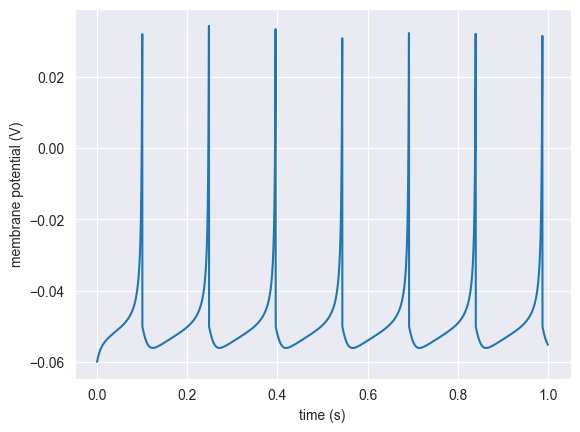

<Axes: xlabel='time (s)', ylabel='membrane potential (V)'>

In [8]:
neuron.plot()

### Create a network of neurons using the composite object

In [9]:
neuron0_doc = {
    '_type': 'step',
    'address': 'local:simple-neuron',
    'config': neuron_config0,
    'inputs': {},
    'outputs': {'duration': ['duration_store0'], 'data': ['data_store0']}
}


neuron1_doc = {
    '_type': 'step',
    'address': 'local:simple-neuron',
    'config': neuron_config1,
    'inputs': {},
    'outputs': {'duration': ['duration_store1'], 'data': ['data_store1']}
}

In [11]:
neuron_network_doc = {
    'neuron0': neuron0_doc,
    'neuron1': neuron1_doc,
    'emitter': {
        '_type': 'step',
        'address': 'local:ram-emitter',
        'config': {
            'emit': {
                'duration0': 'integer',
                'data0': 'list',
                'duration1': 'integer',
                'data1': 'list'}
        },
        'inputs': {
            'duration0': ['duration_store0'], 
            'data0': ['data_store0'],
            'duration1': ['duration_store1'], 
            'data1': ['data_store1']}
    }
}


wf = Composite(config={'state': neuron_network_doc}, core=CORE)

wf.run(1)
wf_results = wf.gather_results()

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-JaN5cQMh-py3.11/lib/python3.11/site-packages/neuroml/nml/generatedssupersuper.py:160: DeprecationWarning:

The 'warn' method is deprecated, use 'warning' instead

pyNeuroML >>> WARNING - Build time validation is disabled.
/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-JaN5cQMh-py3.11/lib/python3.11/site-packages/neuroml/nml/generatedssupersuper.py:101: DeprecationWarning:

The 'warn' method is deprecated, use 'warning' instead

pyNeuroML >>> WARNING - Build time validation is disabled.
/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-JaN5cQMh-py3.11/lib/python3.11/site-packages/neuroml/nml/generatedssupersuper.py:160: DeprecationWarning:

The 'warn' method is deprecated, use 'warning' instead

pyNeuroML >>> WARNING - Build time validation is disabled.
/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-JaN5cQ

It's valid!
It's valid!


pyNeuroML >>> INFO - Command completed successfully!
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/alexanderpatrie/Desktop/repos/biosimulator-processes/demos/izhikevich2007_single_cell_network.nml
pyNeuroML >>> INFO - Writing LEMS Simulation example-single-izhikevich2007cell-sim to file: LEMS_example-single-izhikevich2007cell-sim.xml...
pyNeuroML >>> INFO - Written LEMS Simulation example-single-izhikevich2007cell-sim to file: LEMS_example-single-izhikevich2007cell-sim.xml
pyNeuroML >>> INFO - Loading LEMS file: LEMS_example-single-izhikevich2007cell-sim.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx2G  -Djava.awt.headless=true -jar  "/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-JaN5cQMh-py3.11/lib/python3.11/site-packages/pyneuroml/utils/./../lib/jNeuroML-0.13.1-jar-with-dependencies.jar"  LEMS_example-single-izhikevich2007cell-sim.xml  -nogui -I '') in directory: .
pyNeuroML >>> INFO - Command completed successfully!

In [12]:
wf_results

{('emitter',): [{'duration0': 0,
   'data0': [],
   'duration1': 2000,
   'data1': [array([[0.000e+00, 1.200e-01],
           [1.000e-04, 1.000e-01],
           [2.000e-04, 1.000e-01],
           ...,
           [9.998e-01, 1.000e-01],
           [9.999e-01, 1.000e-01],
           [1.000e+00, 1.000e-01]])]}]}

In [21]:
data = wf_results[('emitter',)][0]['data'][0]

x = [arr[0] for arr in data]
y = [arr[1] for arr in data]

<Axes: >

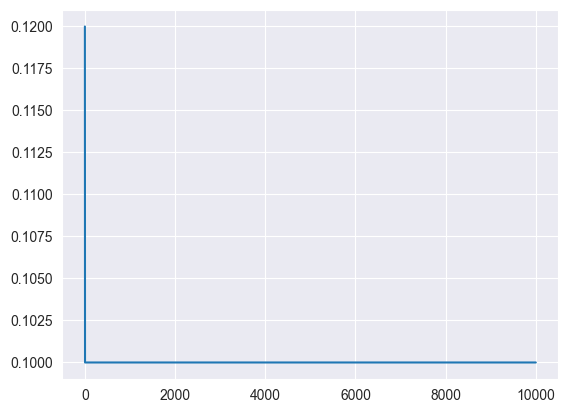

In [23]:
import seaborn as sns 


sns.lineplot(y)

### Create a network of neuron using pyneuroml

In [8]:
network = SimpleNeuronNetwork(
    config={
        'num_neurons': 2,
        'doc_config': {
            'doc_name': "NeuroMLDocument",
            'doc_id': "IzNet",
            'model_name': "Izhikevich2007Cell",
            'model_id': "iz2007RS0",
            'param_config': {
                'v0': "-60mV",
                'C': "100pF",
                'k': "0.7nS_per_mV",
                'vr': "-60mV",
                'vt': "-40mV",
                'vpeak': "35mV",
                'a': "0.03per_ms",
                'b': "-2nS",
                'c': "-50.0mV",
                'd': "100pA"  
            },
        },
        'synapse_config': {
            "ExpOneSynapse": {
                'synapse_id': "syn0",
                'synapse_params': {
                    'erev': "0mV",
                    'gbase': "65nS",
                    'tau_decay': "3ms"
                }
            }
        },
        'network_config': {
            'network_id': "IzNet",
            'population_config': {
                "IzPop0": {
                    'size': 5,
                    'property_config': {
                        'tag': "color",
                        'value': "0 0 .8"
                    }
                },
                "IzPop1": {
                    'size': 5,
                    'property_config': {
                        'tag': "color",
                        'value': "0 0 .8"
                    }
                }
            }
        },
        'save_dir': os.getcwd()
    }, 
    core=CORE
)

NameError: name 'component_factory' is not defined

In [ ]:
!cat iz2007RS0.nml

In [ ]:
network.outputs()

In [ ]:
network.update({})

In [ ]:
x = {'a': [1, 2], 'b': [3, 4]}

x[1]

In [ ]:
neuron